## 1. Pytorch Fundamental



In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.6.0+cu124


## Introduction to tensors

### Creating tensors
PyTorch tensors are created using `torch.Tensor()` = https://pytorch.org/docs/stable/tensors.html

In [ ]:
# scalar
scalar = torch.tensor(2)
scalar

tensor(2)

In [ ]:
scalar.ndim
# scalar has no dimentions

0

In [ ]:
# get tensor back as python int
scalar.item()

2

In [ ]:
# vector
vector = torch.tensor([1,2])
vector

tensor([1, 2])

In [ ]:
vector.ndim     # no.of square brackets

1

In [ ]:
vector.shape

torch.Size([2])

In [ ]:
# Matrix
MATRIX = torch.tensor([[1,2],
                        [3,4]])
MATRIX

tensor([[1, 2],
        [3, 4]])

In [ ]:
MATRIX.ndim

2

In [ ]:
MATRIX.shape

torch.Size([2, 2])

In [ ]:
MATRIX[0]

tensor([1, 2])

In [ ]:
# Tensor
TENSOR =  torch.tensor([[[1,2,3],[3,6,9],[2,4,5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [ ]:
TENSOR.ndim

3

In [ ]:
TENSOR.shape

torch.Size([1, 3, 3])

It says that we have got one 3 by 3 tensor
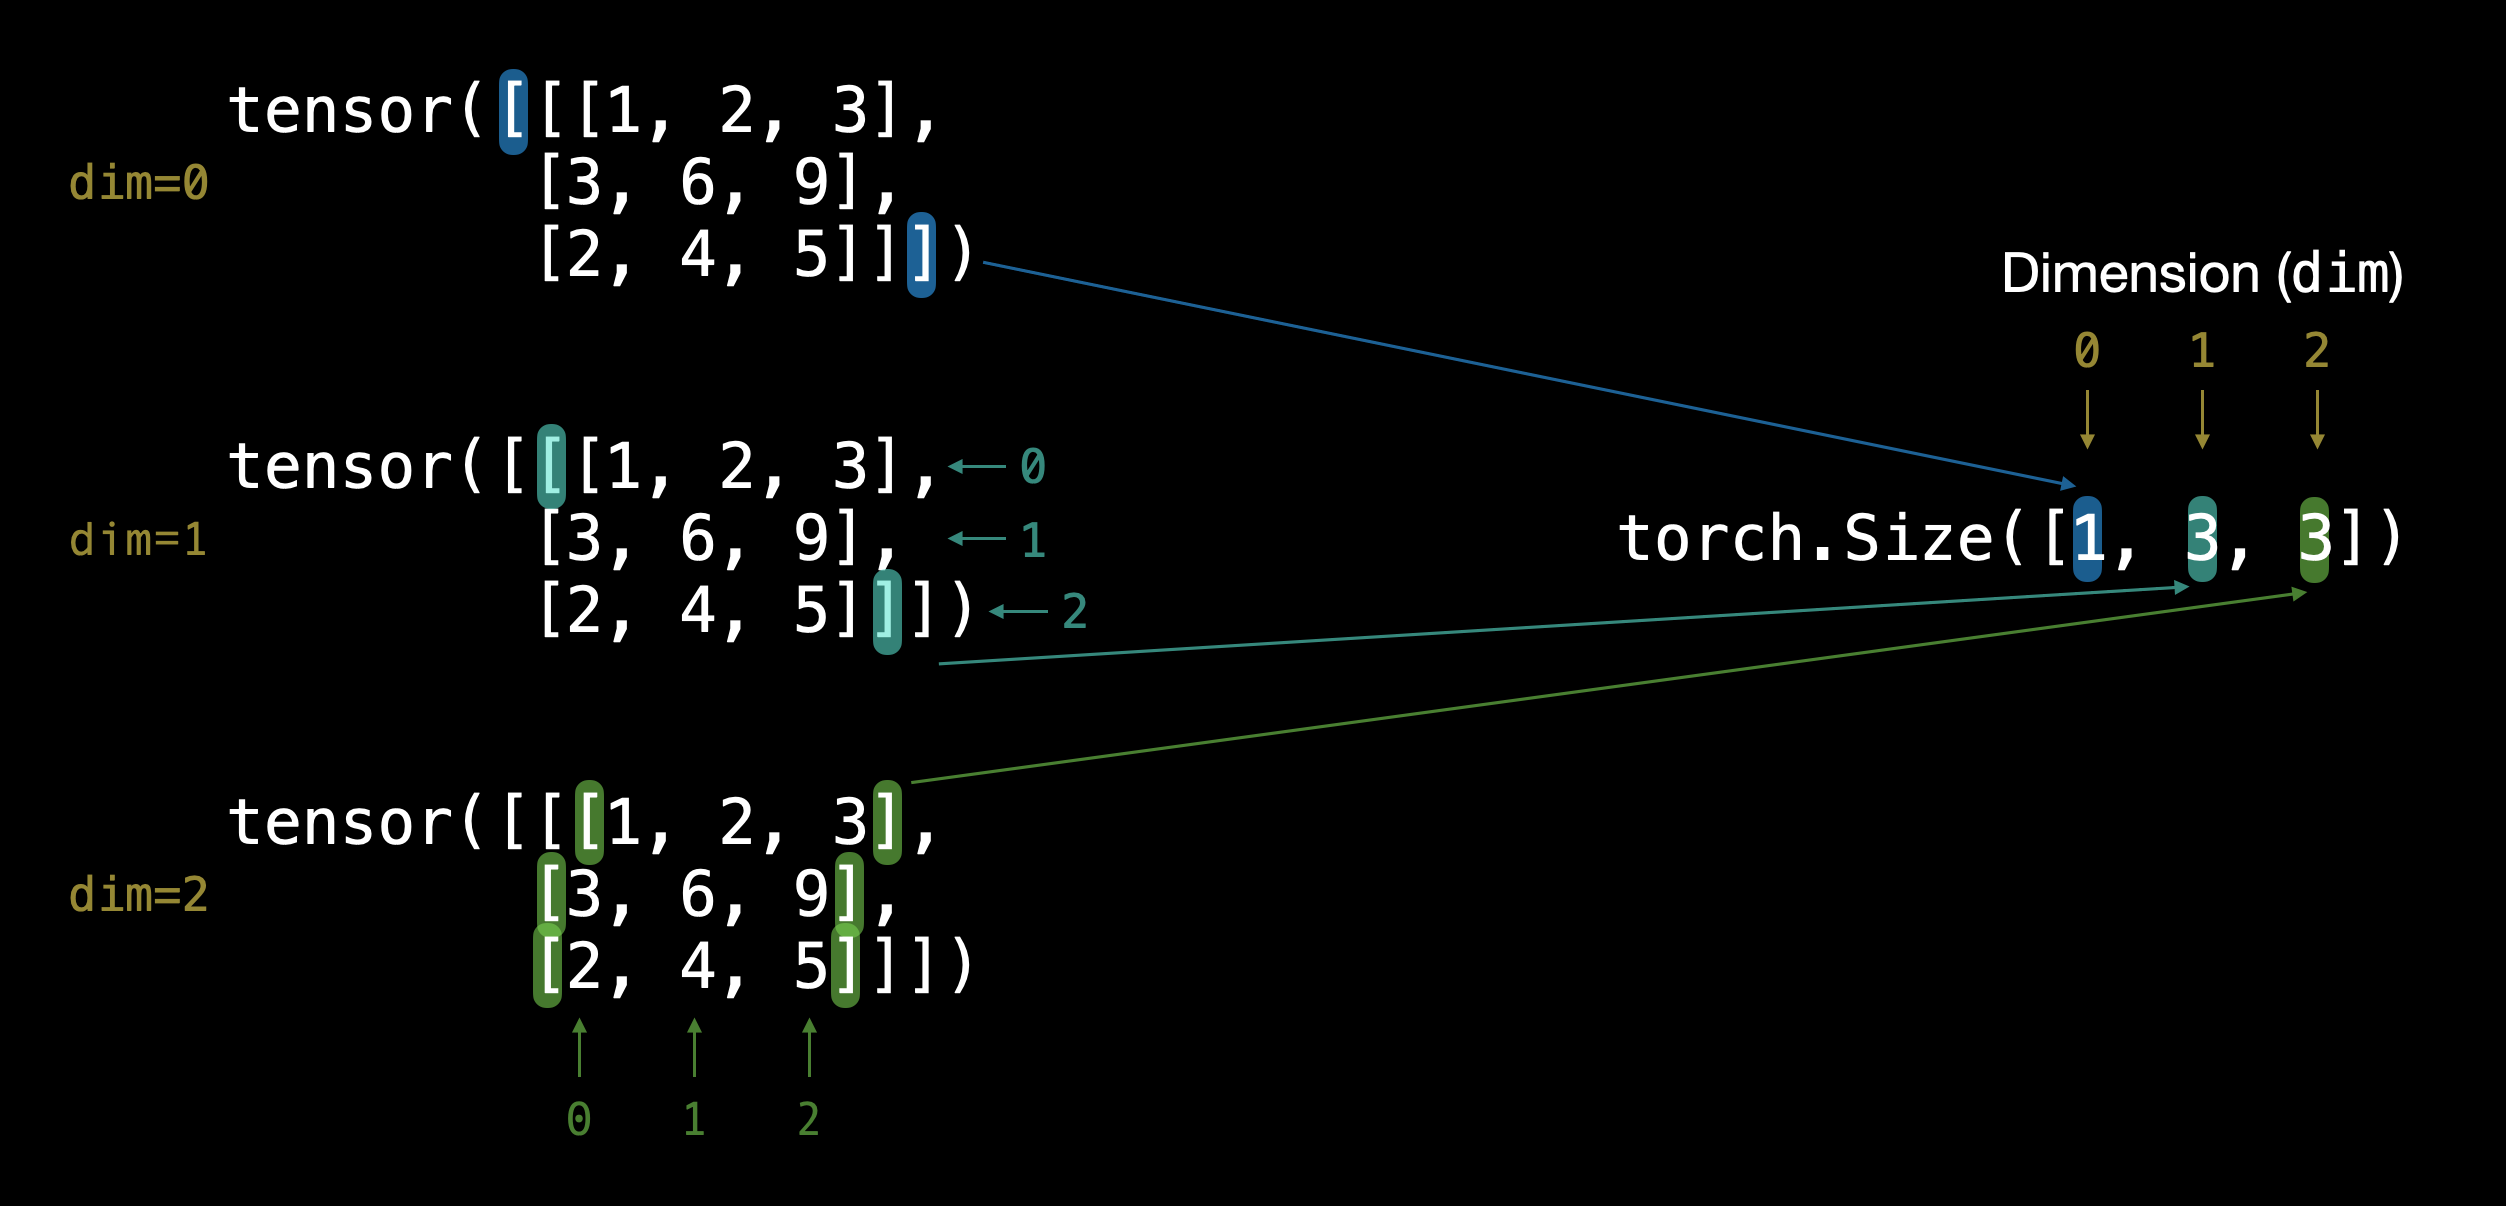

In [ ]:
TENSOR2 = torch.tensor([[[[[2,4,8],
                           [3,6,9],
                           [4,6,5]]]]])
TENSOR2

tensor([[[[[2, 4, 8],
           [3, 6, 9],
           [4, 6, 5]]]]])

In [ ]:
TENSOR2.ndim

5

In [ ]:
TENSOR2.shape

torch.Size([1, 1, 1, 3, 3])

### Random Tensors

Why Random tensors?

Random tensors are imp because the way many neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent the data.

`Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers`

Torch random tensors: https://pytorch.org/docs/stable/generated/torch.rand.html

In [ ]:
# Create a random tensor of size (3,4)
random_tensor = torch.rand(1,3,4)
random_tensor

tensor([[[0.0309, 0.6084, 0.7956, 0.0955],
         [0.6026, 0.5858, 0.0466, 0.9936],
         [0.1516, 0.6353, 0.1909, 0.9388]]])

In [ ]:
random_tensor.ndim

3

In [ ]:
# create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(224,224,3)) # height, width, color channels (R,G,B)
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

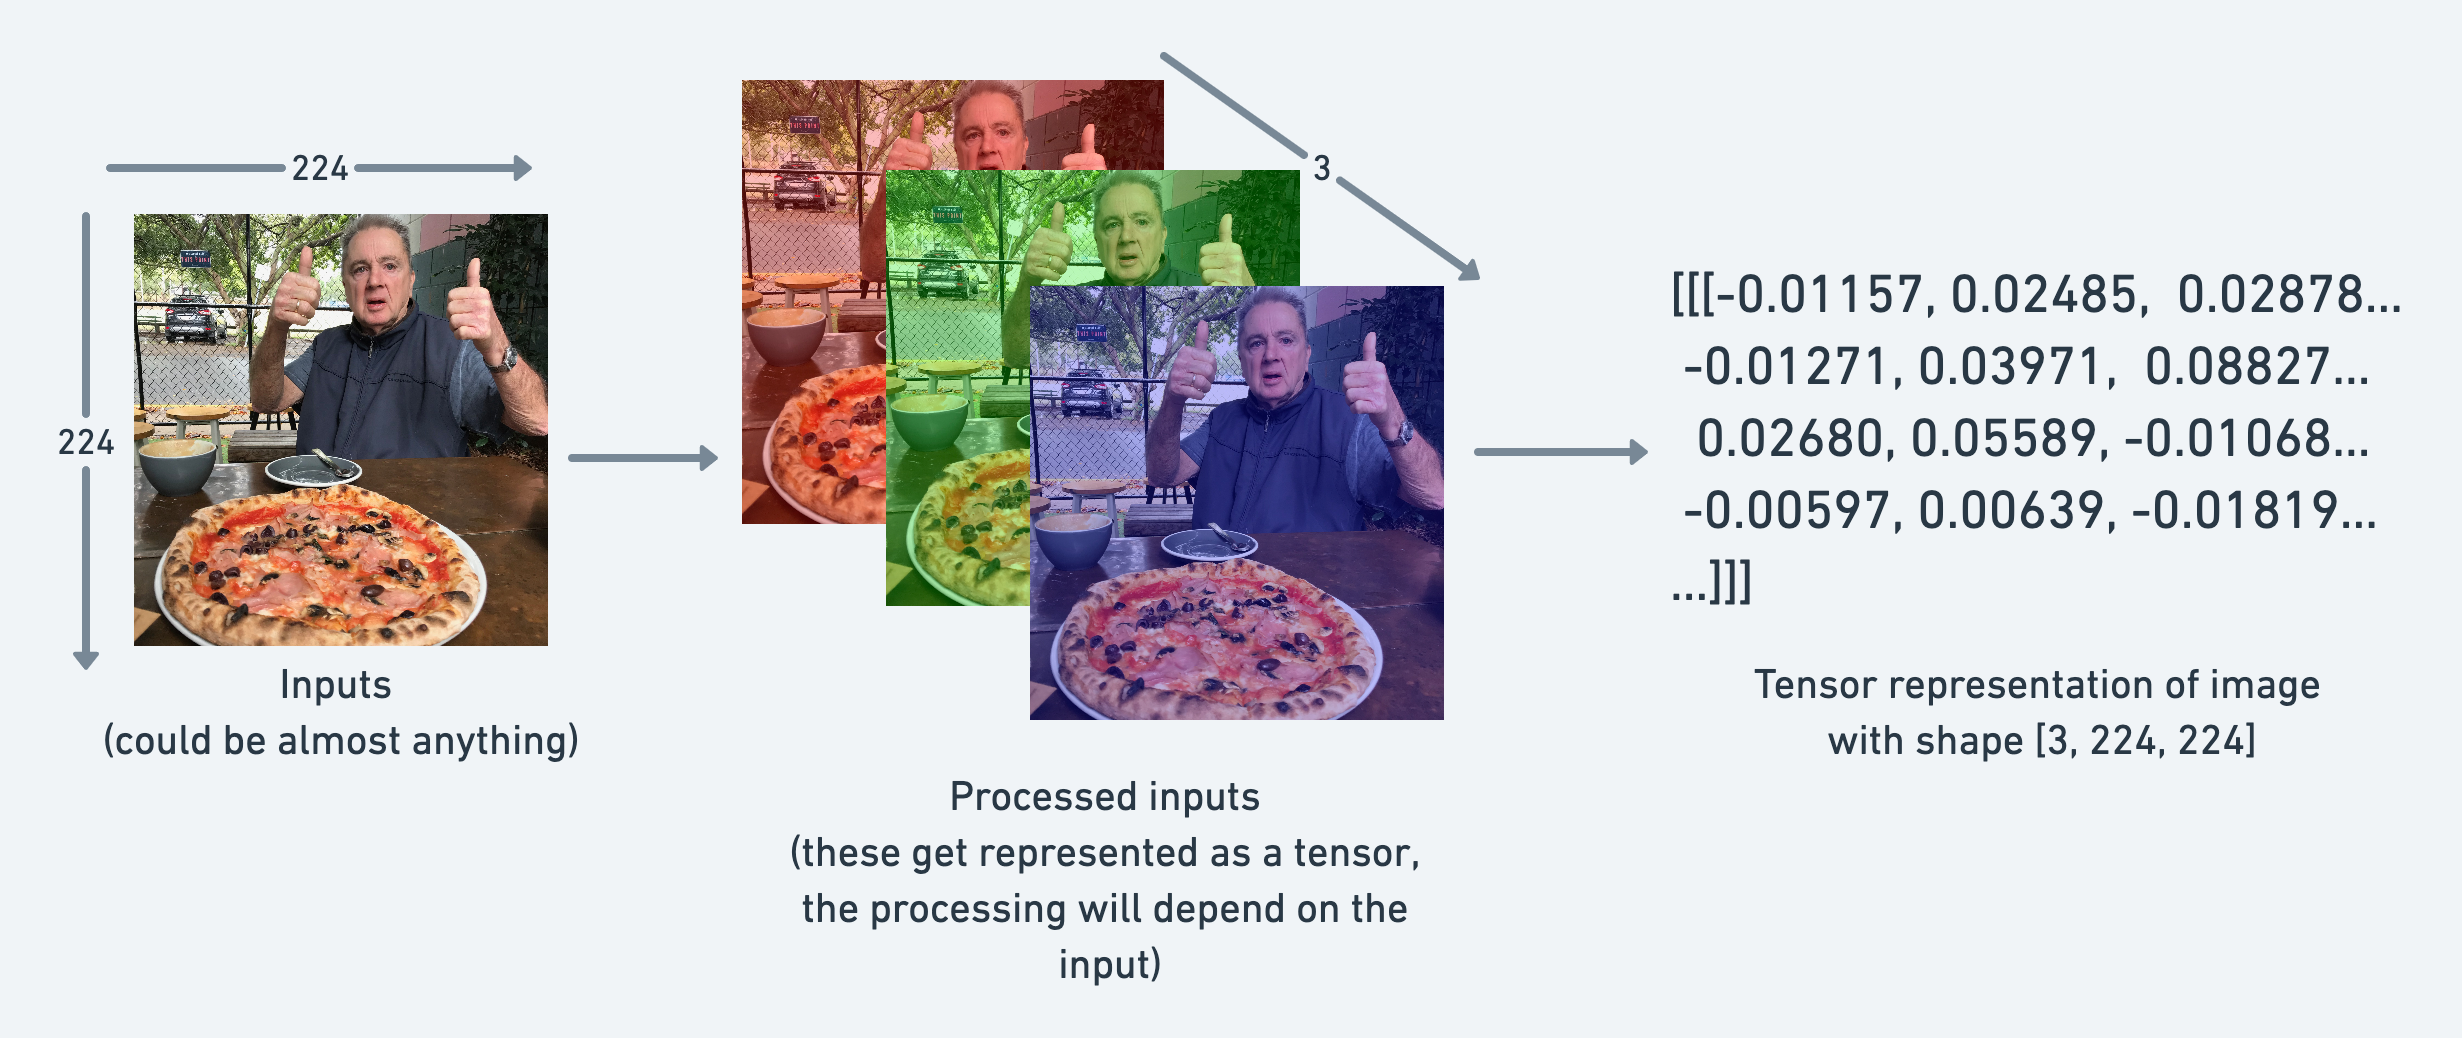

 ### Zeros and ones

In [ ]:
# create a tensor of all zeros
zeros = torch.zeros(size=(3,4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
zeros*random_tensor

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
# create a tensor of all ones
ones = torch.ones(size=(2,3))
ones

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
ones.dtype

torch.float32

### Create a range of tensors and tensors-like

In [ ]:
# Use torch.range() and get deprecated msg, use torch.arange()
one_to_ten = torch.arange(start=1, end=11, step=1)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
# create tensors like
ten_zeros = torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes

Datatypes: https://docs.pytorch.org/docs/stable/tensors.html

**Note:** Tensor datatypes is one of the 3 big errors you'll run into with PyTorch & deep learning:
1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not on the right device

Precision in computing : https://en.wikipedia.org/wiki/Precision_(computer_science)

In [ ]:
# float32 tensor
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None,   # what datatype is the tensor
                               device=None,  # what device is your tensor on
                               requires_grad=False)  # whether or not to track gradients with this tensors operations
float_32_tensor

tensor([3., 6., 9.])

In [ ]:
float_32_tensor.dtype  # float32 is the default datatype of tensors

torch.float32

In [ ]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [ ]:
float_16_tensor * float_32_tensor  # works! => some operations might work for some dtypes

tensor([ 9., 36., 81.])

In [ ]:
int_32_tensor = torch.tensor([3, 6, 9], dtype=torch.int32)
int_32_tensor

tensor([3, 6, 9], dtype=torch.int32)

In [ ]:
float_32_tensor * float_32_tensor

tensor([ 9., 36., 81.])

### Getting information from tensors (tensor attributes not functions)

1. Tensors not right datatype - to get datatype from a tensor, can use `tensor.dtype`
2. Tensors not right shape - to get shape of a tensor, can use `tensor.shape`
3. Tensors not on the right device- to get device of the tensor, can use `tensor.device`

In [ ]:
# Create a tensor

some_tensor = torch.rand(3,4)
some_tensor

tensor([[0.4099, 0.7971, 0.2310, 0.7962],
        [0.3114, 0.6643, 0.3217, 0.2797],
        [0.5603, 0.5868, 0.1053, 0.6319]])

In [ ]:
# find out details from the tensor
print(some_tensor)
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Device of tensor: {some_tensor.device}")

tensor([[0.4099, 0.7971, 0.2310, 0.7962],
        [0.3114, 0.6643, 0.3217, 0.2797],
        [0.5603, 0.5868, 0.1053, 0.6319]])
Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Device of tensor: cpu


### manipulating tensors (tensor operations)

Tensor operations include:
- Addition
- Subtraction
- Multiplication (element-wise)
- Division
- Matrix multiplication

In [ ]:
# create a tensor
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [ ]:
# multiply tensor by 10
tensor * 10

tensor([10, 20, 30])

In [ ]:
# subtract 110
tensor - 10

tensor([-9, -8, -7])

In [ ]:
# PyTorch inbuilt functions
torch.mul(tensor, 10)

tensor([10, 20, 30])

In [ ]:
torch.add(tensor, 10)

tensor([11, 12, 13])

### Matrix Multiplication

Two main ways of performing multiplication in neural networks & deep learning:
1. Element-wise multiplication
2. Matrix multiplication (dot product)

There are 2 main rules that performing matrix multiplication must satisfy:
1. the **inner dimensions** must match:
- `(3, 2) @ (3, 2)` won't work
- `(2, 3) @ (3, 2)` will work
- `(3, 2) @ (2, 3)` will work
2. The resulting matrix has the shape of the **outer dimension**:
- `(2, 3) @ (3, 2)` -> `(2, 2)`
- `(3, 2) @ (2, 3)` -> `(3, 3)`

In [ ]:
# element-wise mul
print(tensor, "*", tensor)
print(f"Equals: {tensor * tensor}")

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [ ]:
# matrix mul
torch.matmul(tensor, tensor)

tensor(14)

In [ ]:
# time taken for matrix mul by hand
%%time
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 1.22 ms, sys: 37 µs, total: 1.26 ms
Wall time: 2.16 ms


In [ ]:
# time taken for matrix mul by torch
%%time
torch.matmul(tensor, tensor)

CPU times: user 34 µs, sys: 6 µs, total: 40 µs
Wall time: 43.6 µs


tensor(14)

In [ ]:
# shapes for matrix mul
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]])

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]])

torch.mm(tensor_A, tensor_B)  # mm is short for matmul

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [ ]:
tensor_B.shape, tensor_A.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

To fix our tensor shape issues, we can manipulate the shape of one of our tensors using a **transpose**.

A **transpose** switches the axes or dimensions of a given tensor.

In [ ]:
tensor_B, tensor_B.shape

(tensor([[ 7, 10],
         [ 8, 11],
         [ 9, 12]]),
 torch.Size([3, 2]))

In [ ]:
tensor_B.T, tensor_B.T.shape

(tensor([[ 7,  8,  9],
         [10, 11, 12]]),
 torch.Size([2, 3]))

In [ ]:
torch.matmul(tensor_A, tensor_B.T), torch.matmul(tensor_A, tensor_B.T).shape

(tensor([[ 27,  30,  33],
         [ 61,  68,  75],
         [ 95, 106, 117]]),
 torch.Size([3, 3]))

In [ ]:
# the matrix mul operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}")
print(f"New shapes: tensor_A = {tensor_A.shape} (same shape as above), tensor_B.T = {tensor_B.T.shape}")
print(f"Multiplying: {tensor_A.shape} @ {tensor_B.T.shape} <- inner dimensions must match")
print("\nOutput:")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])
New shapes: tensor_A = torch.Size([3, 2]) (same shape as above), tensor_B.T = torch.Size([2, 3])
Multiplying: torch.Size([3, 2]) @ torch.Size([2, 3]) <- inner dimensions must match

Output:
tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

Output shape: torch.Size([3, 3])


### Finding the min, max, mean, sum, etc. (tensor aggregation)

In [ ]:
# create a tensor
x = torch.arange(0, 100, 10)
x, x.dtype

(tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]), torch.int64)

In [ ]:
# find the min
torch.min(x), x.min()

(tensor(0), tensor(0))

In [ ]:
# find the max
torch.max(x), x.max()

(tensor(90), tensor(90))

In [ ]:
# ifnd the mean - note: the torch.mean() function requires a tensor of float or complex dtype to work
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

In [ ]:
# find the sum
torch.sum(x), x.sum()

(tensor(450), tensor(450))

### Finding the positional min and max

In [ ]:
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
# Find the position in tensor that has the min value with argmin() -> returns index position of target tensor where minimum value occurs
x.argmin()

tensor(0)

In [ ]:
x[0]

tensor(0)

In [ ]:
# Find the position in tensor that has the max value with argmax() -> returns index position of target tensor where maximum value occurs
x.argmax()

tensor(9)

In [ ]:
x[9]

tensor(90)

### Reshaping, Stacking, squeezing and unsqueezing tensors

- Reshaping - reshapes an input tensor to a defined shape
- View - Return a view of an input tensor of certain shape but keep the same memory
- Stacking - combine multiple tensors on top of each other (vstack) or side by side (hstack)
- Squeeze - removes all `1` dimensions from a tensor
- Unsqueeze - adds a `1` dimension to our target tensor
- Permute - Return a view of the input with dimensions permuted (swapped) in a certain way

In [ ]:
# create a tensor
import torch
x = torch.arange(1., 10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [ ]:
# add an extra dimension
x_reshaped = x.reshape(1, 9)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# change the view
z = x.view(1, 9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# changing z changes x (becausee their memories are same)
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [ ]:
# stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0)
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [ ]:
torch.vstack([x, x, x, x])

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [ ]:
torch.hstack([x, x, x, x])

tensor([5., 2., 3., 4., 5., 6., 7., 8., 9., 5., 2., 3., 4., 5., 6., 7., 8., 9.,
        5., 2., 3., 4., 5., 6., 7., 8., 9., 5., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
# squeeze() -> removes all single dimensions from target tensor
print(f"Previous tensor: {x_reshaped.shape}")
print(f"New tensor: {x_reshaped.squeeze().shape}")

# remove extra dimensions from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: torch.Size([1, 9])
New tensor: torch.Size([9])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New shape: torch.Size([9])


In [ ]:
# unsqueeze() -> adds a single dimension to a target tensor at a specific dimension
print(f"Previous tensor: {x_squeezed.shape}")
print(f"Previous shape: {x_squeezed.shape}")

# add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: torch.Size([9])
Previous shape: torch.Size([9])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
New shape: torch.Size([1, 9])


In [ ]:
# permute() -> rearranges the dimensions of the target tensor in a specified order
x_original = torch.rand(size=(224, 224, 3)) # [height, width, colour_channels]

# permute the original tensor to rearrange the axis (or dim) order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}") # [colour_channels, height, width]

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


In [ ]:
x_original[0, 0, 0] = 728128
x_original[0, 0, 0], x_permuted[0, 0, 0]

(tensor(728128.), tensor(728128.))

### Indexing (selecting data from tensors)

Indexing with PyTorch is similar to indexing with NumPy

In [ ]:
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [ ]:
# lets index
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
# lets index on middle bracket
x[0][0]

tensor([1, 2, 3])

In [ ]:
# lets index on the most inner bracket
x[0][0][0]

tensor(1)

In [ ]:
x[0][2][2]

tensor(9)

In [ ]:
# you can also use ":" to select "all" of a target dimension
x[:, 0]

tensor([[1, 2, 3]])

In [ ]:
# get all values of 0th and 1st dimension but only 1 index of 2nd dim
x[:, :, 1]

tensor([[2, 5, 8]])

In [ ]:
# get all values of the 0th dimension but only 1 index value of 1st and 2nd dim
x[:, 1, 1]

tensor([5])

In [ ]:
# get index 0 of 0th and 1st dim and all values of 2nd dim
x[0, 0, :]

tensor([1, 2, 3])

In [ ]:
# get 3, 6, 9
x[:,:,2]

tensor([[3, 6, 9]])

### PyTorch tensors and NumPy

NumPy is a popular scientific Python numerical computing library.

And because of thi PyTorch has functionality to interact with it.

- Data in NumPy, want in PyTorch tensor -> `torch.from_numpy(ndarray)`
- Pytorch tensor to NumPy -> `torch.Tensor.numpy()`

In [ ]:
# Numpy array to tensor
import numpy as np
import torch

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)  # warning: when converting from numpy to pytorch, pytorch reflects numpy's default datatype of float64 unless specified otherwise
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
array.dtype

dtype('float64')

In [ ]:
# change the value of array, what will this do to tensor?
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
# tensor to numpy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [ ]:
numpy_tensor.dtype

dtype('float32')

In [ ]:
# change the tensor, what happens to numpy_tensor?
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducibility (trying to take random out of random)

How a neural network works in short:

`start with random numbers -> tensor operations -> update random numbers to try and make them better representations of the data -> again -> again -> again...`

To reduce the randomness in neural networks and PyTorch comes the concept of **random seed**.

Essentially, what rhe random seed does is "flavour" the randomness.

In [ ]:
import torch

# create 2 random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.4603, 0.7381, 0.7899, 0.2403],
        [0.7367, 0.1615, 0.7681, 0.5667],
        [0.1065, 0.5365, 0.1919, 0.9165]])
tensor([[0.6726, 0.2471, 0.9252, 0.9770],
        [0.1312, 0.9034, 0.9557, 0.4047],
        [0.6008, 0.4952, 0.0911, 0.8399]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
# lets make some random but reproducible tensors
import torch

# set the random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3, 4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


Extra resources for reproducibility:
- https://pytorch.org/docs/stable/notes/randomness.html
- https://en.wikipedia.org/wiki/Random_seed


## Running tensors and Pytorch objects on the GPUs (and making faster computations)

GPUs = faster computation on numbers, thanks to CUDA + NVIDIA hardware +PyTorch working behind the scenes to make everything hunky dory (good)

### 1. Getting a GPU

1. Easiest - use google Colab for free GPU (options to upgrade as well)
2. Use your own GPU - takes a little bit of setup and requires the investment of purchasing a GPU, there's a lot of options... see this post: https://timdettmers.com/2023/01/30/which-gpu-for-deep-learning/
3. Use cloud computing - GCP, AWSm Azure, these services allow you to rent computers on the cloud and access them.

For 2., 3. PyTorch + GPU drivers (CUDA) takes a little bit of setting up, to do this, refer to PyTorch settup documentation: https://pytorch.org/get-started/locally/

In [ ]:
!nvidia-smi

Fri Jul 25 10:03:25 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   69C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### 2. Check for GPU access for PyTorch

In [2]:
import torch
torch.cuda.is_available()

True

For PyTorch since it's capable of running compute on GPU or CPU, it's best practice to setup device aignostic code: https://docs.pytorch.org/docs/stable/notes/cuda.html#best-practices

E.g. run on GPU if available, else default to CPU

In [3]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
# count number of devices
torch.cuda.device_count()

1

### 3. Putting tensors (and models) on the GPU

The reason we want our tensors / models on the GPU is because using a GPU results in faster computations.

In [5]:
# create a tensor (default on the cpu)
tensor = torch.tensor([1, 2, 3])

# tensor not on gpu
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [6]:
# move tensor to gpu
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

### 4. Moving tensors back to the cpu

In [7]:
# If tensor is on GPU, cant transform it to NumPy
tensor_on_gpu.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [8]:
# To fix the GPU tensor eith NumPy issue, we can first set it to the CPU
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

## Exercises and Extra cirriculum



### Exercises

https://www.learnpytorch.io/00_pytorch_fundamentals/#exercises

1. Documentation reading - A big part of deep learning (and learning to code in general) is getting familiar with the documentation of a certain framework you're using. We'll be using the PyTorch documentation a lot throughout the rest of this course. So I'd recommend spending 10-minutes reading the following (it's okay if you don't get some things for now, the focus is not yet full understanding, it's awareness). See the documentation on `torch.Tensor` and for `torch.cuda`.

2. Create a random tensor with shape (7, 7).

In [11]:
tensor_A = torch.rand(7, 7)
tensor_A

3. Perform a matrix multiplication on the tensor from 2 with another random tensor with shape (1, 7) (hint: you may have to transpose the second tensor).

In [12]:
tensor_B = torch.rand(1, 7)
torch.matmul(tensor_A, tensor_B.T)

tensor([[1.8289],
        [1.4667],
        [2.2849],
        [1.6189],
        [1.3613],
        [2.7948],
        [1.5645]])

4. Set the random seed to 0 and do exercises 2 & 3 over again.

In [17]:
RANDOM_SEED = 0
torch.manual_seed(RANDOM_SEED)
tensor_A = torch.rand(7, 7)
torch.manual_seed(RANDOM_SEED)
tensor_B = torch.rand(1, 7)
print(tensor_A)
print(tensor_B)
torch.matmul(tensor_A, tensor_B.T)

tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901],
        [0.8964, 0.4556, 0.6323, 0.3489, 0.4017, 0.0223, 0.1689],
        [0.2939, 0.5185, 0.6977, 0.8000, 0.1610, 0.2823, 0.6816],
        [0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527, 0.0362],
        [0.1852, 0.3734, 0.3051, 0.9320, 0.1759, 0.2698, 0.1507],
        [0.0317, 0.2081, 0.9298, 0.7231, 0.7423, 0.5263, 0.2437],
        [0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932, 0.2783]])
tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901]])


tensor([[1.5985],
        [1.1173],
        [1.2741],
        [1.6838],
        [0.8279],
        [1.0347],
        [1.2498]])

5. Speaking of random seeds, we saw how to set it with torch.manual_seed() but is there a GPU equivalent? (hint: you'll need to look into the documentation for `torch.cuda` for this one). If there is, set the GPU random seed to 1234.

In [25]:
RANDOM_SEED = 1234
torch.cuda.manual_seed(RANDOM_SEED)
tensor_A = torch.rand(7, 7, device=device)
torch.cuda.manual_seed(RANDOM_SEED)
tensor_B = torch.rand(1, 7, device=device)
print(tensor_A)
print(tensor_B)
torch.matmul(tensor_A, tensor_B.T)

tensor([[0.1272, 0.8167, 0.5440, 0.6601, 0.2721, 0.9737, 0.3903],
        [0.3394, 0.5451, 0.7312, 0.3864, 0.5959, 0.7578, 0.2126],
        [0.7198, 0.9845, 0.5518, 0.0981, 0.0582, 0.5839, 0.1083],
        [0.9461, 0.3170, 0.8328, 0.6676, 0.2886, 0.9022, 0.8115],
        [0.1784, 0.9534, 0.1486, 0.3882, 0.7977, 0.1752, 0.5777],
        [0.1949, 0.8499, 0.3125, 0.2156, 0.0383, 0.4934, 0.3138],
        [0.3121, 0.5664, 0.1266, 0.7097, 0.0040, 0.5147, 0.2811]],
       device='cuda:0')
tensor([[0.1272, 0.8167, 0.5440, 0.6601, 0.2721, 0.9737, 0.3903]],
       device='cuda:0')


tensor([[2.5893],
        [2.1242],
        [1.8872],
        [2.5468],
        [1.7516],
        [1.6445],
        [1.6517]], device='cuda:0')

6. Create two random tensors of shape (2, 3) and send them both to the GPU (you'll need access to a GPU for this). Set `torch.manual_seed(1234)` when creating the tensors (this doesn't have to be the GPU random seed).

In [27]:
torch.manual_seed(1234)
tensor_A = torch.rand(2, 3)
tensor_A = tensor_A.to(device)
torch.manual_seed(1234)
tensor_B = torch.rand(2, 3)
tensor_B = tensor_B.to(device)
print(tensor_A)
print(tensor_B)

tensor([[0.0290, 0.4019, 0.2598],
        [0.3666, 0.0583, 0.7006]], device='cuda:0')
tensor([[0.0290, 0.4019, 0.2598],
        [0.3666, 0.0583, 0.7006]], device='cuda:0')


7. Perform a matrix multiplication on the tensors you created in 6 (again, you may have to adjust the shapes of one of the tensors).

In [29]:
tensor_AB = torch.matmul(tensor_A, tensor_B.T)
tensor_AB

tensor([[0.2299, 0.2161],
        [0.2161, 0.6287]], device='cuda:0')

8. Find the maximum and minimum values of the output of 7.

In [30]:
print(tensor_AB.min(), tensor_AB.max())

tensor(0.2161, device='cuda:0') tensor(0.6287, device='cuda:0')


9. Find the maximum and minimum index values of the output of 7.

In [31]:
print(tensor_AB.argmin(), tensor_AB.argmax())

tensor(1, device='cuda:0') tensor(3, device='cuda:0')


10. Make a random tensor with shape (1, 1, 1, 10) and then create a new tensor with all the 1 dimensions removed to be left with a tensor of shape (10). Set the seed to 7 when you create it and print out the first tensor and it's shape as well as the second tensor and it's shape.

In [33]:
torch.manual_seed(7)
tensor_A = torch.rand(1, 1, 1, 10)
torch.manual_seed(7)
tensor_B = tensor_A.squeeze()
print(f"Original tensor: {tensor_A, tensor_A.shape}")
print(f"Squeezed tensor: {tensor_B, tensor_B.shape}")

Original tensor: (tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
           0.3653, 0.8513]]]]), torch.Size([1, 1, 1, 10]))
Squeezed tensor: (tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
        0.8513]), torch.Size([10]))


### Extra-curriculum
1. Spend 1-hour going through the PyTorch basics tutorial https://pytorch.org/tutorials/beginner/basics/intro.html (I'd recommend the Quickstart and Tensors sections).
2. To learn more on how a tensor can represent data, see this video: What's a tensor? https://youtu.be/f5liqUk0ZTw